# Project: Investigate a no-show appointments dataset 

<i>Author: Gilvan Reis</i>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I decide to analyse the no-show in medical appointments in Brazil. After downloading the dataset, I visited its <a src='https://www.kaggle.com/joniarroba/noshowappointments'>Kaggle page</a> to know more information about its characteristics and start asking some questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Looking at its characteristics, I formulated the following questions:
1. Do women tend to seek more medical appointments?
2. Which age group seeks more medical appointments? 
3. Which weekday have more medical appointments?
4. Which gender, age group, and weekday have more no-shows?

<a id='wrangling'></a>
## Data Wrangling

### Check General Properties
Let's take a look at some information about this dataset.

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I can see that there are no missing data in any characteristic. Also, I can see that the characteristics "ScheduleDay" and "AppointmentDay" are with wrong types and need to be converted to datetime.

The characteristic "Patientid" and "AppointmentID" probably will not be relevant for the analysis and can be removed. But I will make this later because they can be used to check if there are duplicated entries.

Let's describe the data in this dataset.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


"Age" has some odd values (for instance, someone with -1 years old) and I need to fix this later. 

"Handcap" seems to have some odd values too because in Kaggle page the "Handcap" characteristic has a boolean value, but here it has a numeric value. Searching in the discussions, <a src='https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356'>the dataset creator told that this number is valid and refers to the number of disabilites a person has</a>. So nothing is wrong here.

Let's check the non-numeric fields.

In [6]:
df.describe(exclude=[np.number])  

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [7]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [8]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

"Gender", "No-show" and "Neighbourhood" seems to have valid values. 

"No-show" needs to be renamed to "No_show" to be enabled to be called as an attribute (only to enable to use of the autocomplete).

I will investigate "ScheduleDay" and "AppointmentDay" after fix its type, to avoid some problems with the manipulation of dates in a string format.

### Rename No-show
So let's start editing by the "No-show".

In [10]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Fix Age Odd Values

Let's check "Age" odd values.

In [11]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

There are two values whose I need to investigate more: -1 and 115. So let's take a closer look.

In [12]:
df[(df.Age > 100) | (df.Age < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is an interesting discovery here. The entries in the index 63912 and 63915 are for the same patient on the same date only changing the id of the appointment, so it's probably a duplicated data. Let's come back to this later.

There are two different patients with age equal to 115. Because <a src='https://pt.wikipedia.org/wiki/Lista_de_supercenten%C3%A1rios_brasileiros'>there are some people that are 115 years old</a> I will consider this data as legit.

Let me investigate if I can discover the age of the patient in index 99832.

In [13]:
df[df.PatientId == df.PatientId[99832]]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Unfortunately, there is no other entry for the same patient, so I can not infer its age. Because of this, I will remove it.

In [14]:
df.drop(99832, inplace=True)
df.shape

(110526, 14)

### Remove Duplicated Values

Let's check for duplicated values

In [15]:
df.duplicated().sum()

0

As we saw above, some entries can be duplicated for the same patient, only changing the "AppointmentID". So let's check without this characteristic.

In [16]:
df.duplicated(subset=df.columns.difference(['AppointmentID'])).sum()

618

So we have 618 possible duplicated results. Let's check again for duplicates, but this time let's include all characteristics that are not related to the patient (like age or if it has diabetes) and is not the id of the appointment.

In [17]:
df.duplicated(subset=['PatientId', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'SMS_received', 'No_show']).sum()

618

Great! Because I got the same number, I can affirm that those entries are duplicated and I can remove them.

In [18]:
df.drop_duplicates(subset=['PatientId', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'SMS_received', 'No_show'], inplace=True)
df.shape

(109908, 14)

### Fix Wrong DataTypes

Let's convert "ScheduleDay" and "AppointmentDay" type to datetime

In [19]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109908 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       109908 non-null  float64            
 1   AppointmentID   109908 non-null  int64              
 2   Gender          109908 non-null  object             
 3   ScheduledDay    109908 non-null  datetime64[ns, UTC]
 4   AppointmentDay  109908 non-null  datetime64[ns, UTC]
 5   Age             109908 non-null  int64              
 6   Neighbourhood   109908 non-null  object             
 7   Scholarship     109908 non-null  int64              
 8   Hipertension    109908 non-null  int64              
 9   Diabetes        109908 non-null  int64              
 10  Alcoholism      109908 non-null  int64              
 11  Handcap         109908 non-null  int64              
 12  SMS_received    109908 non-null  int64              
 13  No_show       

In [21]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Fix odd values in datetime fields

Now let's check for odd values in "ScheduledDay" and "AppointmentDay"

In [22]:
# I need to use the parameter datetime_is_numeric to avoid a FutureWarning
df.ScheduledDay.describe(datetime_is_numeric=True)

count                                 109908
mean     2016-05-09 08:43:22.336099072+00:00
min                2015-11-10 07:13:56+00:00
25%      2016-04-29 10:40:41.750000128+00:00
50%         2016-05-10 12:25:20.500000+00:00
75%      2016-05-20 11:40:45.750000128+00:00
max                2016-06-08 20:07:23+00:00
Name: ScheduledDay, dtype: object

In [23]:
df.ScheduledDay.unique()

<DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103548, dtype: datetime64[ns, UTC]

In [24]:
df.AppointmentDay.describe(datetime_is_numeric=True)

count                                 109908
mean     2016-05-19 01:12:43.707828224+00:00
min                2016-04-29 00:00:00+00:00
25%                2016-05-09 00:00:00+00:00
50%                2016-05-18 00:00:00+00:00
75%                2016-05-31 00:00:00+00:00
max                2016-06-08 00:00:00+00:00
Name: AppointmentDay, dtype: object

In [25]:
df.AppointmentDay.unique()

<DatetimeArray>
['2016-04-29 00:00:00+00:00', '2016-05-03 00:00:00+00:00',
 '2016-05-10 00:00:00+00:00', '2016-05-17 00:00:00+00:00',
 '2016-05-24 00:00:00+00:00', '2016-05-31 00:00:00+00:00',
 '2016-05-02 00:00:00+00:00', '2016-05-30 00:00:00+00:00',
 '2016-05-16 00:00:00+00:00', '2016-05-04 00:00:00+00:00',
 '2016-05-19 00:00:00+00:00', '2016-05-12 00:00:00+00:00',
 '2016-05-06 00:00:00+00:00', '2016-05-20 00:00:00+00:00',
 '2016-05-05 00:00:00+00:00', '2016-05-13 00:00:00+00:00',
 '2016-05-09 00:00:00+00:00', '2016-05-25 00:00:00+00:00',
 '2016-05-11 00:00:00+00:00', '2016-05-18 00:00:00+00:00',
 '2016-05-14 00:00:00+00:00', '2016-06-02 00:00:00+00:00',
 '2016-06-03 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
 '2016-06-07 00:00:00+00:00', '2016-06-01 00:00:00+00:00',
 '2016-06-08 00:00:00+00:00']
Length: 27, dtype: datetime64[ns, UTC]

It seems that all dates are right, but the "AppointmentDay" does not have time information.

Let's check the relationship between these two characteristics.

In [26]:
df.query('ScheduledDay > AppointmentDay')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,No


There are more than 38k entries that do not respect the relationship between these fields (the "ScheduledDay" needs to be lower than "AppointmentDay").

Because of the missing time in "AppointmentDay", some entries are false positives. So I decided to drop the time from "ScheduledDay" and make a comparation using only the date information.

In [27]:
df.ScheduledDay = df.ScheduledDay.dt.normalize()

Let's repeat the query and find if there are any odd data

In [28]:
df.query('ScheduledDay > AppointmentDay')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
27033,7.839273e+12,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes


Now, this data clearly are more likely to be some odd data, so let's remove it. I could use the drop function with the index from the query above, but I will simply do the negative query.

In [29]:
df = df.query('ScheduledDay <= AppointmentDay')
df.shape

(109903, 14)

### Drop Unnecessary Characteristics

As told before, "PatientId" and "AppointmentID" are data that don't seem to have useful information to the data analysis. So let's drop it.

In [30]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [31]:
df.shape

(109903, 12)

### Create Age Group

Let's group "Age". I will use the same group definition used by <a src='https://www.statcan.gc.ca/eng/concepts/definitions/age2'>the government of Canada</a>, who is based on UNO classification.

It's grouped by:
* Child (0 - 14 years)
* Youth (15 - 24 years)
* Adult (25 - 64 years)
* Senior (65 years and over)

In [32]:
df.Age.describe()

count    109903.000000
mean         37.086986
std          23.121169
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [33]:
bin_edges = [-1, 14, 24, 64, 115]
bin_labels = ['Child', 'Youth', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df.Age, bin_edges, labels=bin_labels)

In [34]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AgeGroup
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult


### Create Appointment Weekday
Let's calculate the day of the week for each appointment.

In [35]:
# I decide to use strftime instead of weekday function, because this already come with the right name
df['AppointmentWeekday'] = df.AppointmentDay.dt.strftime('%A')
df.AppointmentWeekday

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: AppointmentWeekday, Length: 109903, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. Do Women Tend to Seek More Medical Appointments?

To answer this question, let's evaluate the proportion of each gender in our dataset

In [36]:
def calculate_proportional_values(dataframe, attribute_name):
    "Calculate the proportion of each attribute value in a dataframe"
    return dataframe[attribute_name].value_counts() / dataframe[attribute_name].count()

In [37]:
gender_proportion = calculate_proportional_values(df, 'Gender')
gender_proportion

F    0.649846
M    0.350154
Name: Gender, dtype: float64

We can see that about 65% of the people who sought a medical appointment was female. But let's make a graph about this information.

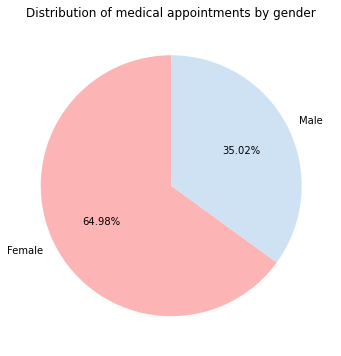

In [38]:
labels = ['Female', 'Male']
sizes = gender_proportion

plt.figure(figsize=(6, 6))
plt.title("Distribution of medical appointments by gender")
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#fdb4b4ff', '#cfe2f3ff']);

### Q2. Which Age Group Seeks More Medical Appointments?

I can answer by plotting a histogram of the age groups in our dataset.

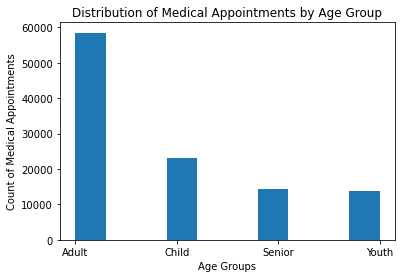

In [39]:
plt.hist(df.AgeGroup)
plt.title('Distribution of Medical Appointments by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count of Medical Appointments');

Based on this graph, I can conclude that "Adult" is the group who seek more medical appointment.

### Q3. Which Weekday Have More Medical Appointments?

I can answer this question using the "AppointmentWeekday" characteristic.

In [40]:
appointment_weekday_proportion = calculate_proportional_values(df, 'AppointmentWeekday')
appointment_weekday_proportion

Wednesday    0.234243
Tuesday      0.232114
Monday       0.205381
Friday       0.171651
Thursday     0.156256
Saturday     0.000355
Name: AppointmentWeekday, dtype: float64

As expected, almost every medical appointment are realized during the weekdays.

Let's plot this information, but first I need to manually insert the sunday proportion.

In [41]:
appointment_weekday_proportion['Sunday'] = 0
appointment_weekday_proportion

Wednesday    0.234243
Tuesday      0.232114
Monday       0.205381
Friday       0.171651
Thursday     0.156256
Saturday     0.000355
Sunday       0.000000
Name: AppointmentWeekday, dtype: float64

Also, let's order the index by the index to make our plotting easier.

In [42]:
WEEKDAY_ORDER = {
    'Sunday': 1, 
    'Monday': 2, 
    'Tuesday': 3, 
    'Wednesday': 4, 
    'Thursday': 5, 
    'Friday': 6, 
    'Saturday': 7,
}

appointment_weekday_proportion.sort_index(key=lambda x: x.map(WEEKDAY_ORDER), inplace=True)
appointment_weekday_proportion

Sunday       0.000000
Monday       0.205381
Tuesday      0.232114
Wednesday    0.234243
Thursday     0.156256
Friday       0.171651
Saturday     0.000355
Name: AppointmentWeekday, dtype: float64

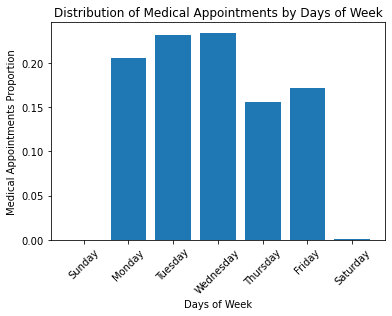

In [43]:
positions = np.arange(1, len(appointment_weekday_proportion.index) + 1)
labels = appointment_weekday_proportion.index

plt.bar(positions, appointment_weekday_proportion)
plt.tick_params(axis='x', labelrotation=45)
plt.xticks(np.arange(1, len(labels) + 1), labels)
plt.title('Distribution of Medical Appointments by Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Medical Appointments Proportion');

Based on this, I can affirm that Wednesday is the day with more medical appointments.

### Q4. Which Gender, Age Group and Weekday Have More No-show?

Before I start answering this question, let's take a look at the proportions of no-show in our dataset.

In [44]:
calculate_proportional_values(df, 'No_show')

No     0.798914
Yes    0.201086
Name: No_show, dtype: float64

Approximately 20% of the appointments in our dataset had a no-show. So let's create a mask to make our search easier

In [45]:
# create masks
showed = df.No_show == 'No'
not_showed = df.No_show == 'Yes'

#### Q4.1 Which gender has more no-show?

Let's see what are the proportion of each gender for the appointment whose the patient not showed.

In [46]:
not_showed_gender_proportion = calculate_proportional_values(df[not_showed], 'Gender')
not_showed_gender_proportion

F    0.654072
M    0.345928
Name: Gender, dtype: float64

Let's check the proportion of those who showed to the appointment.

In [47]:
showed_gender_proportion = calculate_proportional_values(df[showed], 'Gender')
showed_gender_proportion

F    0.648782
M    0.351218
Name: Gender, dtype: float64

It seems that gender doesn't correlate with the no-show. Let's plot it to take a better look

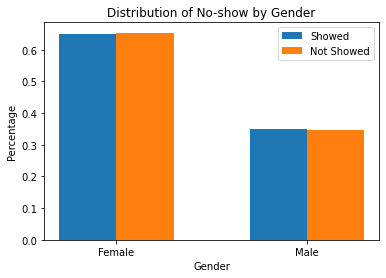

In [48]:
positions = np.array([1, 2])
width = 0.3
labels = ['Female', 'Male']
label_positions = positions + width / 2

plt.bar(positions, showed_gender_proportion, width=width, label='Showed')
plt.bar(positions + width, not_showed_gender_proportion, width=width, label='Not Showed')
plt.legend()
plt.xticks(label_positions, labels)
plt.title('Distribution of No-show by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage');

#### Q4.2 Which Age Group has More No-show?

Let's see the proportion of each age in the appointments whose the patient not showed and compare with whose the patient showed.

Also, I will sort the index as done before.

In [49]:
not_showed_age_group_proportion = calculate_proportional_values(df[not_showed], 'AgeGroup').sort_index()
not_showed_age_group_proportion

Child     0.221357
Youth     0.158778
Adult     0.519774
Senior    0.100090
Name: AgeGroup, dtype: float64

In [50]:
showed_age_group_proportion = calculate_proportional_values(df[showed], 'AgeGroup').sort_index()
showed_age_group_proportion

Child     0.208102
Youth     0.118493
Adult     0.535255
Senior    0.138150
Name: AgeGroup, dtype: float64

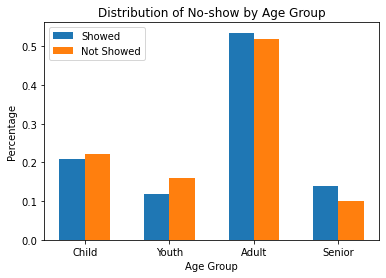

In [51]:
positions = np.arange(1, len(showed_age_group_proportion.index) + 1)
width = 0.3
labels = showed_age_group_proportion.index
label_positions = positions + width / 2

plt.bar(positions, showed_age_group_proportion, width=width, label='Showed')
plt.bar(positions + width, not_showed_age_group_proportion, width=width, label='Not Showed')
plt.legend()
plt.xticks(label_positions, labels)
plt.title('Distribution of No-show by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage');

As can be seen above, Senior is the age group whose tend to show more for the medical appointment proportionally. On other hand, the Youth is the age group whose tend to show less.

#### Q4.3 Which Weekday Has More No-show?

Let's follow the same methodology as the other steps.

In [52]:
not_showed_weekday_proportion = calculate_proportional_values(df[not_showed], 'AppointmentWeekday')
not_showed_weekday_proportion['Sunday'] = 0
not_showed_weekday_proportion.sort_index(key=lambda x : x.map(WEEKDAY_ORDER), inplace=True)
not_showed_weekday_proportion

Sunday       0.000000
Monday       0.209683
Tuesday      0.230860
Wednesday    0.228643
Thursday     0.149819
Friday       0.180588
Saturday     0.000407
Name: AppointmentWeekday, dtype: float64

In [53]:
showed_weekday_proportion = calculate_proportional_values(df[showed], 'AppointmentWeekday')
showed_weekday_proportion['Sunday'] = 0
showed_weekday_proportion.sort_index(key=lambda x : x.map(WEEKDAY_ORDER), inplace=True)
showed_weekday_proportion

Sunday       0.000000
Monday       0.204298
Tuesday      0.232429
Wednesday    0.235653
Thursday     0.157876
Friday       0.169402
Saturday     0.000342
Name: AppointmentWeekday, dtype: float64

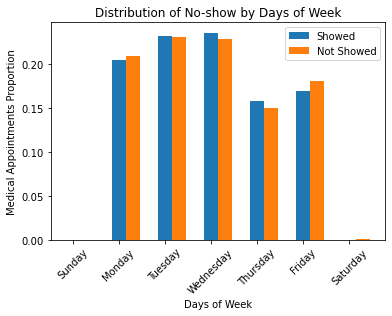

In [54]:
positions = np.arange(1, len(showed_weekday_proportion.index) + 1)
width = 0.3
labels = showed_weekday_proportion.index
label_positions = positions + width / 2

plt.bar(positions, showed_weekday_proportion, width=width, label='Showed')
plt.bar(positions + width, not_showed_weekday_proportion, width=width, label='Not Showed')
plt.tick_params(axis='x', labelrotation=45)
plt.xticks(np.arange(1, len(labels) + 1), labels)
plt.legend()
plt.title('Distribution of No-show by Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Medical Appointments Proportion');

Based on this data, Wednesday is the day of the week with more shows in medical appointments. Friday is the day of the week with more no-shows if compared with the proportion of show.

In [55]:
df.AppointmentDay.describe(datetime_is_numeric=True)

count                                 109903
mean     2016-05-19 01:13:28.716777216+00:00
min                2016-04-29 00:00:00+00:00
25%                2016-05-09 00:00:00+00:00
50%                2016-05-18 00:00:00+00:00
75%                2016-05-31 00:00:00+00:00
max                2016-06-08 00:00:00+00:00
Name: AppointmentDay, dtype: object

<a id='conclusions'></a>
## Conclusions

In this analysis, I could discover that:
- Women tend to search for more medical appointments, but there is no tendency in the gender to show in an appointment.
- Adults tend to search for more medical appointments but Seniors are those who show more proportionally.
- Youths tend to search less medical appointments and they tend to no-show more.
- Wednesday is the day with more medical appointments and Friday is the day with more no-shows proportionally.

I've tried to avoid inserting any information when manipulation the data and even with this conclusion still there are much more questions and data that could be generated based on this dataset. For instance: check the difference between the day of the schedule and the appointment could interfere in the no show or if some patient perfil could no-show more than other.

### Limitations
The main limitation in this analysis is that the data was gathered for medical appointments realized during a little bit more than one month (from the end of April 2016 to the start of June 2016). Any external event that happened during this period could interfere with the data.

Also, because I do not know which methodology was used to gather the data and because there is a lot of confusion in the definition of the data (even on its Kaggle page), so I can not affirm that the data was gathered in an impersonal form and none bias was added to the data.